# Fetal Risk Detection With Machine Learning

# Summary

## **Aim:**

- To build a machine learning model that automates the interpretation of CTG readings to predict fetal risk levels (Normal, Potential Risk, High Risk). The model aims to support midwives and clinical practitioners—particularly in low-resource settings—by reducing reliance on specialized expertise, improving early risk detection, and aiding decision-making during labour through an interpretable, evidence-based system.

## **Problem Statement:**

- Fetal complications remain one of the leading causes of perinatal mortality around the world. Despite advancements in technology, many hospitals still rely on the manual interpretation of cardiotocograms (CTGs)—a process that can be slow, subjective, and inconsistent across clinicians. This challenge calls for a solution that combines medical knowledge with the precision of modern data science. By developing an automated, interpretable machine learning model, we aim to support healthcare professionals in making faster, more accurate decisions when it matters most.

## **Business Context:**

- In the early 2000s, the SisPorto 2.0 system was developed to automate the interpretation of cardiotocography (CTG), capturing fetal heart rate and uterine contraction patterns to support clinical decision-making. While the original paper references a small preliminary study with recordings taken within 48 hours of planned cesareans or shortly before emergency procedures, the dataset used here contains over 2,000 CTG tracings—suggesting it was derived from a broader application of the same system. These traces were likely recorded over the typical 20-minute windows used in antepartum monitoring. Revisiting this legacy dataset with modern machine learning enables us to advance the original goal: reducing subjectivity in CTG interpretation and equipping clinicians with faster, data-driven insights that could improve outcomes for both mothers and babies.

- ***Cardiotocography (CTG)*** is a technique used to monitor fetal heart rate and uterine contractions. In the antenatal period, CTG is typically employed intermittently to assess fetal well-being, especially in high-risk pregnancies. During labor, continuous CTG monitoring is often utilized to detect signs of fetal distress.

-  **Stakeholders:** The primary stakeholders for this project include **Midwives and Clinical Practitioners** involved in interpreting CTG signals during labor and delivery, they will find value in having a reliable tool for accurate, data-driven risk assessments, ultimately aiding in timely and informed intervention strategies during labour.

## **Data Overview:**

This dataset is sourced from Kaggle (https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/data) and contains real-world data from Cardiotocogram (CTG) exams.

- Number of records: 2,126

- Number of features: 22, including both time-series summary statistics and clinical measurements related to fetal health

- Each row in the dataset represents a unique monitoring session for a patient, with the data collected during one continuous period of monitoring of 20 minutes

- Features like hist_mode, hist_variance, and abnormal_stv are summary statistics capturing trends over the monitoring period

- There is  no missing data

- There is no data leakage

- Class imbalance:

  - Normal: 77.8%
  - Potential Risk: 13.9%
  - High Risk: 8.3%



***Citation: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318***

https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9


https://www.academia.edu/23797622/SisPorto_2_0_A_Program_for_Automated_Analysis_of_Cardiotocograms?email_work_card=view-paper

### **Feature Breakdown:**


- ***baseline_heart_rate***

Average fetal heart rate, in the absence of contractions, accelerations, or decelerations, and measured over a 10-minute window (Beats per minute (bpm))

- ***accelerations_per_sec***
  
Rate of accelerations — brief rises in heart rate (>15 bpm for >15 sec), calculated over a 10-minute window (events per second).


Note: Very small values reflect the long window used

- ***fetal_movement_rate***

Number of detected fetal movements (approximate, per second)


Values are small due to long observation duration
 
- ***uterine_contraction_rate***

Estimated frequency of uterine contractions (approximate, per second)


Reflects contraction frequency over full monitoring period

- ***light_decelerations***

Mild decreases in fetal heart rate (events per second)

- ***severe_decelerations***

Deep, abnormal drops in fetal heart rate (events per second)

- ***prolonged_decelerations***
  
Drops in heart rate that last longer than 2 minutes (events per second)

- ***abnormal_stv***

Total number of times short-term variability (beat-to-beat changes) was outside the normal range (count, over full session)

- ***mean_value_stv***

Average beat-to-beat variability in heart rate (milliseconds)

- ***percent_abnormal_ltv***

Percent of time long-term variability was abnormal (%)

- ***mean_value_ltv***

Average long-term variability (over 1-minute windows) (milliseconds)

- ***hist_width***

Range between the lowest and highest heart rate values (Beats per minute (bpm))

- ***hist_min***

Minimum heart rate observed (Beats per minute (bpm))

- ***hist_max***

Maximum heart rate observed (Beats per minute (bpm))

- ***hist_peaks***

Number of peaks in the heart rate signal histogram (count)

- ***hist_zeros***

Number of signal dropouts or zero-value readings (count)

- ***hist_mode***

Most frequently occurring heart rate value (bpm)

- ***hist_mean***

Mean heart rate over the monitoring session (bpm)

- ***hist_median***

Median heart rate value (bpm)

- ***hist_variance***

Variability (spread) of heart rate values (bpm²)

- ***hist_tendency***

General trend of heart rate over time:
-1 = decreasing, 0 = steady, 1 = increasing

- ***fetal_risk***

Final target variable: fetal health class (1 = Normal, 2 = Suspect, 3 = Pathological)

#### **Target Feature**:

- ***Fetal Risk*** (Was changed from fetal_health)

Fetal Risk refers to the likelihood of adverse outcomes affecting the fetus, including distress, hypoxia (lack of oxygen), neurological damage, or stillbirth. 

It has been divided into 3 classes:

- **Normal:**  Indicates normal fetal heart activity and no signs of immediate danger
- **Potential Risk:**  Suggests irregularities that may require monitoring or intervention to prevent complications
- **High Risk:**  Signals strong indicators of fetal distress or abnormal patterns that demand urgent medical attention to prevent serious outcomes

## **Method:**

- **Exploratory Data Analysis** *(EDA)* (Correlation Matrix)
- **Data Preprocessing** *(Wrangling & Feature Engineering)*  (Renamed features, created fetal_risk_labels - encoded version of fetal_risk)
- **Further EDA** (Features with multicollinearity)
- **ML Pipelines (Modeling)**
  - 3 models (Random Forest Classifier, XGBoost, Gradient Boosting)
  - Train/Test Split: 80/20
  - Scaling (Robust Scaler to handle outliers)
  - Addressed Class Imbalance per model (manual class_weights, sample_weights)
  - Fit the models
  - Model Evaluation (Confusion Matrix, Classification Report, ROC Curves, Learning curves - Bias-Variance tradeoff)
- **Model Comparison & Selection**

- **Performance Metric** – Macro F1-Score: I chose the macro F1-score because my dataset is imbalanced across the three fetal risk classes. Macro F1 calculates the F1-score for each class independently and then averages them, giving equal importance to all classes — including the minority ones. 

## **Results and Findings:**

### **Results - Pipeline 1 (Baseline Models)**


**Performance:** All models achieved high macro F1-scores (ranging from 0.86-0.89)

**Top Performer:** XGBoost had the highest F1-score overall, showing strong predictive power across classes (0.899)

**Weakness:** Despite strong performance, XGBoost underperformed slightly on the Potential Risk class, as shown in the confusion matrix and classification report.

**Overfitting**: Learning curves showed all models severely overfit the training data with the training scores plateauing at 1.0, indicating it memorized the data and struggled to generalize.


### **Results - Pipeline 2 (Tuned Models)**

**Performance:** All models achieved high macro F1-scores (ranging from 0.86–0.89)

**Top Performer:** Gradient Boosting had the highest F1-score (0.893), but...

**Weakness:** Gradient Boosting showed stronger signs of overfitting, with a large gap between training and validation scores

**Best Fit:** XGBoost was slightly behind in score (0.899) but had more stable learning and better generalization, making it the safer, more reliable choice—especially in a clinical context

## **Future Work:**

**Model Deployment:** While the model can start as a web-based tool for real-time CTG interpretation in hospitals, it could also be adapted to run offline on tablets or smartphones connected to affordable CTG devices (like Dopplers or basic cardiotocographs), improving diagnostic accuracy and supporting fetal risk detection in clinics without electricity or internet access

**Clinical Collaboration:** Work with midwives/clinical practitioners to validate model outputs

**Advanced Hyperparameter Tuning:** Use GridSearch to further improve performance

**Larger, Diverse Datasets:** Find and add more real CTG data to improve generalizability and fairness

## **Import Libraries**

In [24]:
# Import Libraries

!python --version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler, label_binarize
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Python 3.11.11


#### Read in Data

In [25]:
df = pd.read_csv('fetal_health.csv')

## **Initial EDA (Exploratory Data Analysis)**

In [26]:
# Dataframe Shape
df.shape

(2126, 22)

In [27]:
# Header
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [28]:
# Tail
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [29]:
# Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [30]:
# Data Types
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [31]:
# Descriptive Statistics
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [32]:
# Checking for missing values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [33]:
# Checking for missing values
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [34]:
# Distribution of Fetal Health
df['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

### Comments:

- 2126 rows, 22 features
- All features are defined as floats, regardless of their actual form (eg. integer)
- There are no missing values
- Fetal Health feature has 3 classes (1:Normal, 2:Suspect, 3:Pathological - as defined in cited paper)
- Fetal Health is imbalanced (**Normal:** 77.8%, **Suspect:** 13.9%, **Pathological:** 8.3%)
- Features like hist_mode, hist_variance, and abnormal_stv are summary statistics capturing trends over the monitoring period


- Severe and prolonged decelerations are almost always zero (These features are extremely rare — but even rare occurrences may correlate with high-risk cases)
- Accelerations and fetal Movement are highly skewed (High difference in mean/max values, these might require log transformation or outlier handling to avoid skewing models)
-  High variability in heart rate variability metrics :

   - abnormal_short_term_variability: Ranges from 12 to 87

   - mean_value_of_short_term_variability: Large range from 0.2 to 7.0

   - percentage_of_time_with_abnormal_long_term_variability: Max of 91%
 
     
- Features like light_decelerations, uterine_contractions, histogram_number_of_zeroes are binary but often 0

## **Data Cleaning / Wrangling**

#### Renaming Features

In [35]:
# Renaming features for clearer interpretation 

df.rename(columns={
    'baseline value': 'baseline_heart_rate',
    'accelerations': 'accelerations_per_sec',
    'fetal_movement': 'fetal_movement_rate',
    'uterine_contractions': 'uterine_contraction_rate',
    'light_decelerations': 'light_decelerations',
    'severe_decelerations': 'severe_decelerations',
    'prolongued_decelerations': 'prolonged_decelerations',
    'abnormal_short_term_variability': 'abnormal_stv',
    'mean_value_of_short_term_variability': 'mean_value_stv',
    'percentage_of_time_with_abnormal_long_term_variability': 'percent_abnormal_ltv',
    'mean_value_of_long_term_variability': 'mean_value_ltv',
    'histogram_width': 'hist_width',
    'histogram_min': 'hist_min',
    'histogram_max': 'hist_max',
    'histogram_number_of_peaks': 'hist_peaks',
    'histogram_number_of_zeroes': 'hist_zeros',
    'histogram_mode': 'hist_mode',
    'histogram_mean': 'hist_mean',
    'histogram_median': 'hist_median',
    'histogram_variance': 'hist_variance',
    'histogram_tendency': 'hist_tendency',
    'fetal_health': 'fetal_risk'
}, inplace=True)


In [36]:
# Check the names have been updated
df.head()

,baseline_heart_rate,accelerations_per_sec,fetal_movement_rate,uterine_contraction_rate,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_stv,mean_value_stv,percent_abnormal_ltv,...,hist_min,hist_max,hist_peaks,hist_zeros,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency,fetal_risk
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


#### Mapping Fetal Health to Fetal Risk

Fetal Risk’ better reflects the increasing severity across classes, mapped as Normal, Potential Risk, and High Risk

In [37]:
# New feature to map Fetal Risk
df['fetal_risk_label'] = df['fetal_risk'].map({
    1.0: 'Normal',
    2.0: 'Potential Risk',
    3.0: 'High Risk'
})


## **EDA - Fetal Risk (Target Feature)**

#### Pie Chart

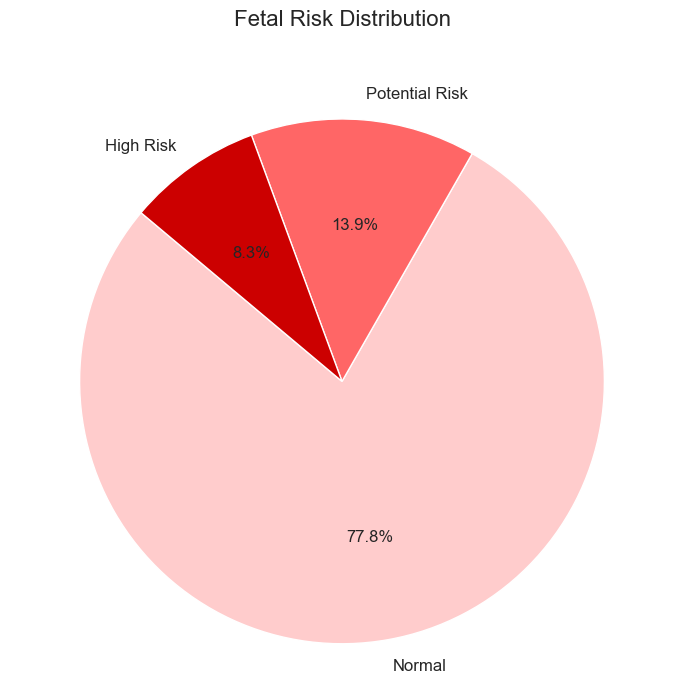

In [38]:
# Pie Chart 

# Count occurrences
risk_counts = df['fetal_risk'].value_counts().sort_index()
labels = risk_counts.index.map({
    1.0: 'Normal',
    2.0: 'Potential Risk',
    3.0: 'High Risk'
})
sizes = risk_counts.values

# Warm colors 
colors = ['#FFCCCC', '#FF6666', '#CC0000']

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('Fetal Risk Distribution', fontsize=16, pad=50)
plt.axis('equal')
plt.tight_layout()
plt.show()


#### Bar Chart

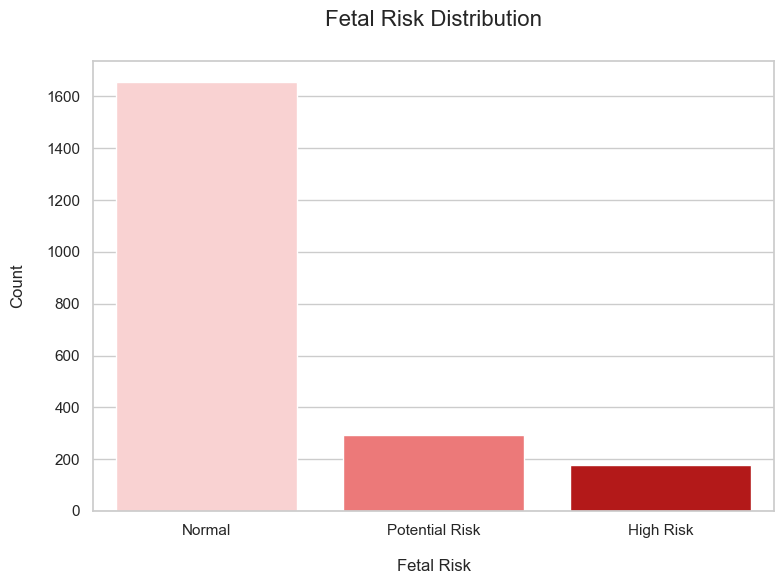

In [39]:
# Bar Chart for Fetal Risk

risk_order = ['Normal', 'Potential Risk', 'High Risk']


plt.figure(figsize=(8, 6))
sns.countplot(
    x='fetal_risk_label', 
    data=df, 
    palette=['#FFCCCC', '#FF6666', '#CC0000'],
    order=risk_order
)

# Titles / Labels
plt.title('Fetal Risk Distribution', fontsize=16, pad=25, fontweight='medium')
plt.xlabel('Fetal Risk', fontsize=12, labelpad=15, fontweight='medium')
plt.ylabel('Count', fontsize=12, labelpad=15, fontweight='medium')


plt.tight_layout()
plt.show()


### Comments:

- With these plots we can clearly visualize Fetal Risk and see how each monitoring period (row) is binned into the 3 classes
- The fetal risk classes are imbalanced, with the majority of CTG recordings labeled as 'Normal', with "High Risk" being the minority
- Fetal Risk is imbalanced (**Normal:** 77.8%, **Potential Risk:** 13.9%, **High Risk:** 8.3%)
- Class imbalance should be addressed during modeling to avoid biased predictions and ensure fair performance across all fetal risk categories

## **EDA - Overall Distribution of all Features**

#### Boxplot of all features

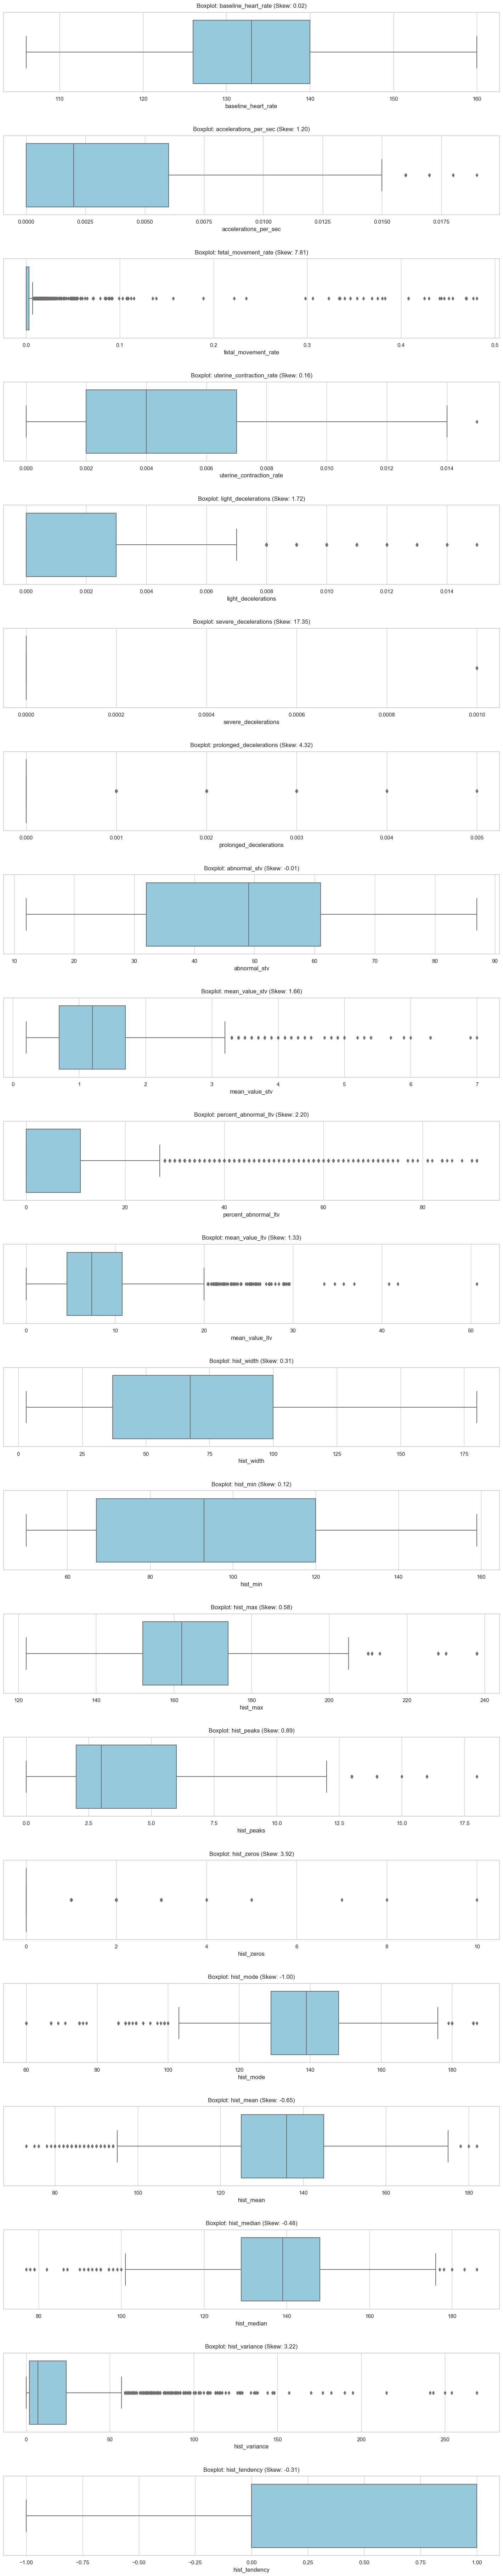

In [40]:
# Boxplot 
# Please note that I know I am defining numereic_features in each block of code instead of just once, this was originally to overide an error

# Numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove 'fetal_risk'
numeric_features = [col for col in numeric_features if col != 'fetal_risk']



plt.figure(figsize=(15, len(numeric_features) * 3.5))  

for i, col in enumerate(numeric_features):
    plt.subplot(len(numeric_features), 1, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot: {col} (Skew: {df[col].skew():.2f})', fontsize=12, pad=10)  


plt.tight_layout(pad=3.0) 

plt.show()



#### Histograms of all features

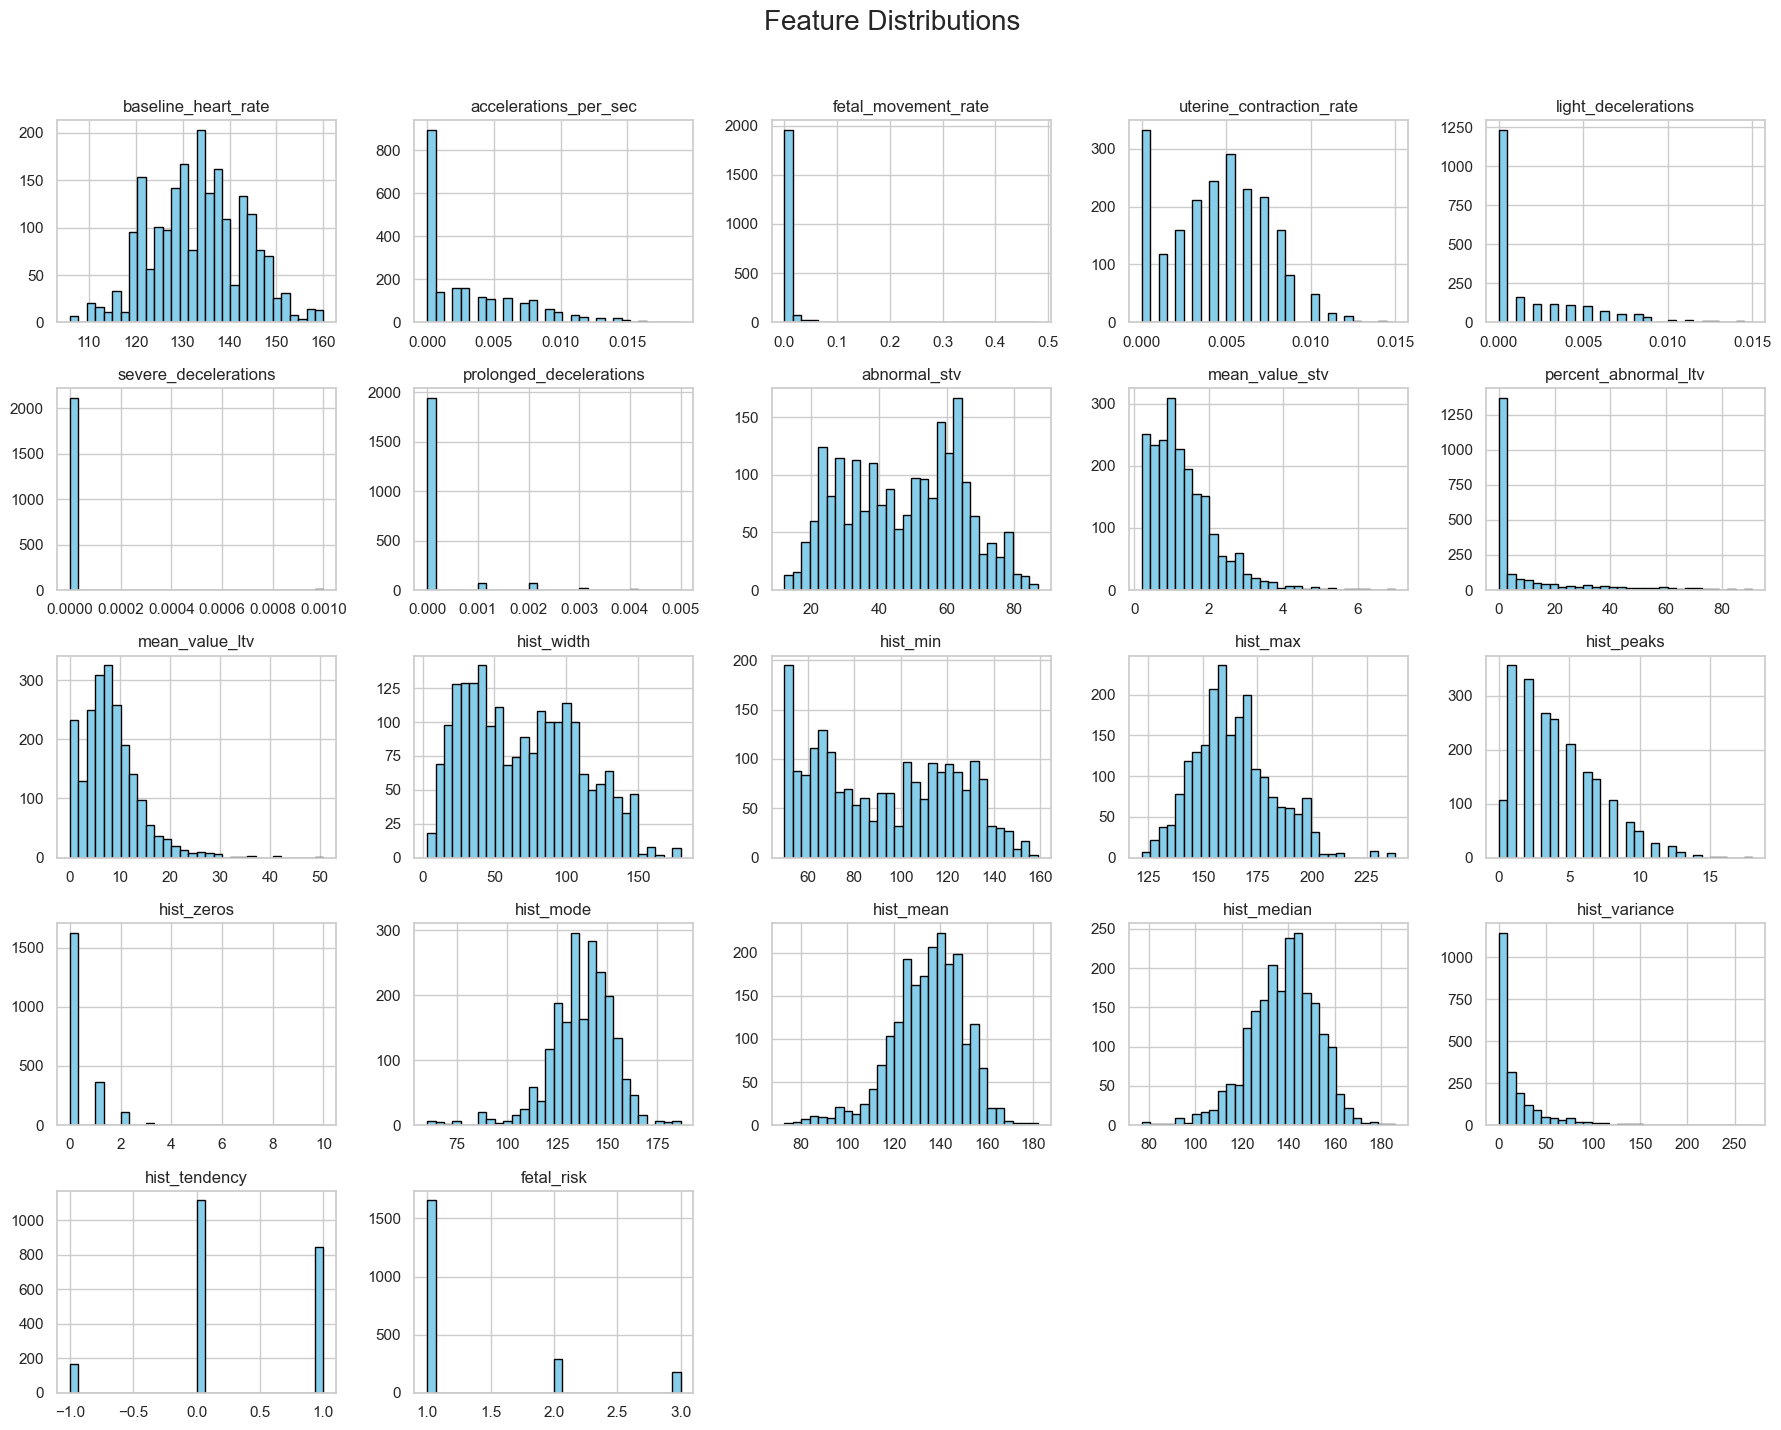

In [41]:
# Plot histograms

# Define numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


df[numeric_features].hist(bins=30, figsize=(18, 14), color='skyblue', edgecolor='black')

# Adjust spacing
plt.suptitle("Feature Distributions", fontsize=20, y=1.02)  
plt.subplots_adjust(top=0.95)  
plt.tight_layout()
plt.show()


### Comments:

- **Note:** *Both plots and skew calculations for binary classes can be ignored*
- A lot of the features are skewed and have many outliers
- fetal_movement_rate has the highest skewness at 7.8, indicating a strong right skew. This means that the majority of patients exhibit low fetal movement rates
- hist_variance is significantly right skewed showing that most patients have a smaller pre-computed variance of fetal heart rate over time


#### Calculating Skewness 

In [42]:
# Skewness List

# Exclude binary columns and fetal risk (those with only 2-3 unique values)
non_binary_cols = [col for col in df.columns if df[col].nunique() > 3]
skewed_vals = df[non_binary_cols].apply(skew)

print(skewed_vals)

baseline_heart_rate         0.020298
accelerations_per_sec       1.203542
fetal_movement_rate         7.805965
uterine_contraction_rate    0.159202
light_decelerations         1.717224
prolonged_decelerations     4.320914
abnormal_stv               -0.011820
mean_value_stv              1.656170
percent_abnormal_ltv        2.193526
mean_value_ltv              1.331058
hist_width                  0.314013
hist_min                    0.115702
hist_max                    0.577455
hist_peaks                  0.892256
hist_zeros                  3.917521
hist_mode                  -0.994476
hist_mean                  -0.650560
hist_median                -0.478077
hist_variance               3.217702
dtype: float64


#### Investigating Outliers

In [43]:
# Outliers List

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, numeric_features):
    outlier_summary = {}
    
    for feature in numeric_features:
        # Calculate Q1, Q3, and IQR
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        
        # Store the number of outliers
        outlier_summary[feature] = len(outliers)
    
    return outlier_summary

# Detect outliers for numeric features
outlier_summary = detect_outliers_iqr(df, numeric_features)

# Convert the summary to a DataFrame for easier visualization
outlier_summary_df = pd.DataFrame(list(outlier_summary.items()), columns=['Feature', 'Number of Outliers'])


print(outlier_summary_df)



                     Feature  Number of Outliers
0        baseline_heart_rate                   0
1      accelerations_per_sec                  14
2        fetal_movement_rate                 307
3   uterine_contraction_rate                   1
4        light_decelerations                 150
5       severe_decelerations                   7
6    prolonged_decelerations                 178
7               abnormal_stv                   0
8             mean_value_stv                  70
9       percent_abnormal_ltv                 309
10            mean_value_ltv                  71
11                hist_width                   0
12                  hist_min                   0
13                  hist_max                  24
14                hist_peaks                  19
15                hist_zeros                 502
16                 hist_mode                  73
17                 hist_mean                  45
18               hist_median                  28
19             hist_

### Comments:

- The dataset contains several features that are highly skewed and contain a significant number of outliers. These variables often represent rare or extreme clinical events that occur in only a small portion of the population.

- Examples of highly skewed, sparse event features include:

   - fetal_movement_rate

   - prolonged_decelerations

   - hist_zeros

   - hist_variance

   - percent_abnormal_ltv
 
- These skewed features can bias model training by overemphasizing rare cases or introducing instability. To handle them, I could apply transformations (e.g., log), treat extreme values as outliers, or use robust models less sensitive to distribution skew

#### Correlation Heatmap

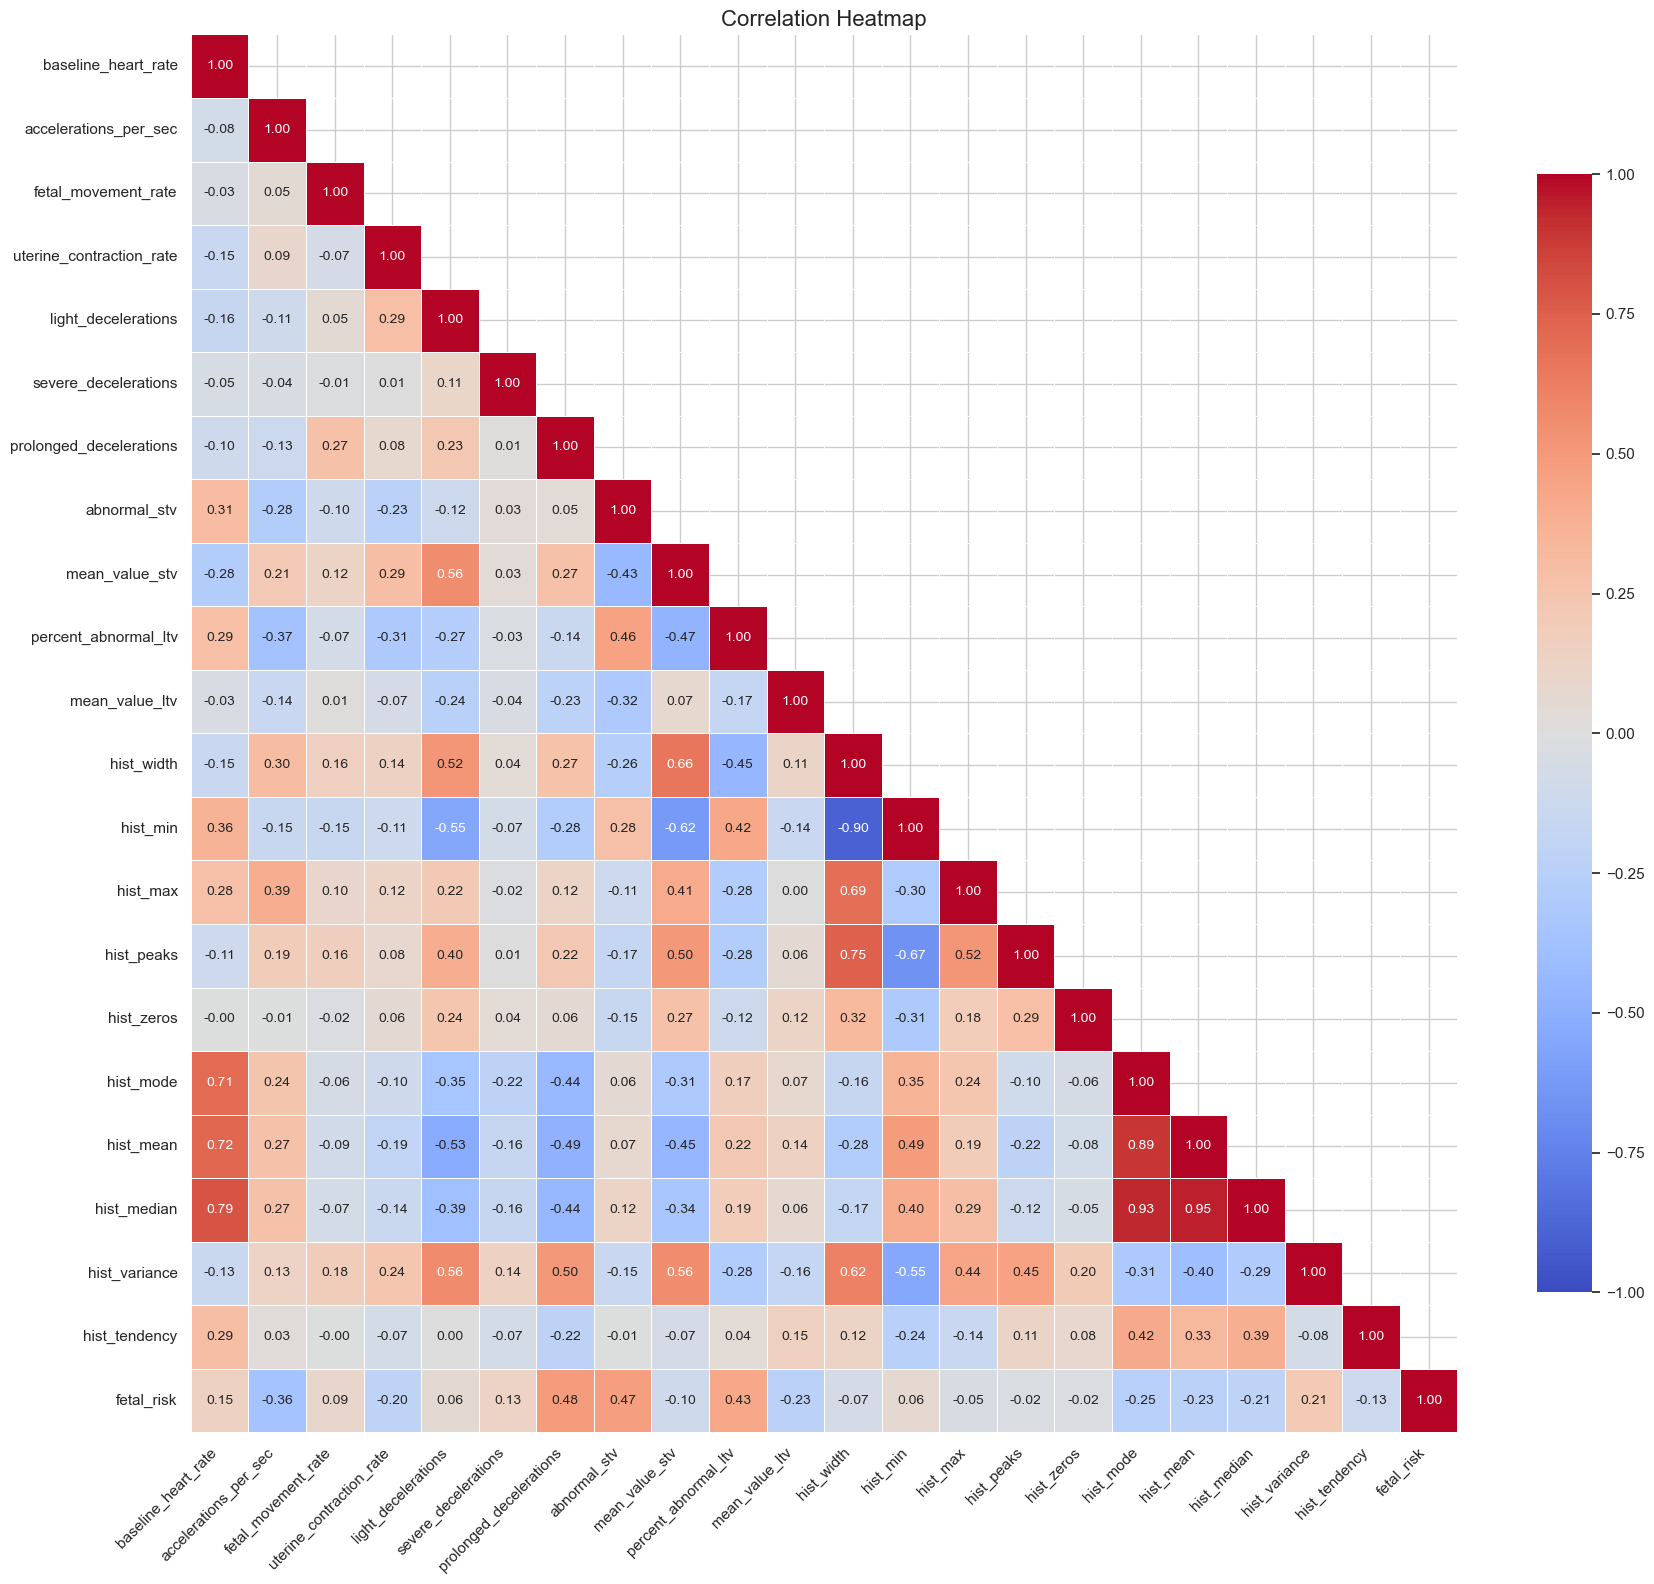

In [44]:
# Correlation Heatmap

# Select numeric columns and calculate correlation
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Set upper triangle to NaN directly
corr_matrix_lower = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=0).astype(bool))

# Plot the heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(
    corr_matrix_lower,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 10},
    linewidths=0.5,
    cbar=True
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Comments
- Fetal Risk has the highest correlation with:

  + Prolonged Decelerations
  + Abnormal stv (Short-term Variation)
  + Percent Abnormal ltv (Long-term Variation)
  + Accelerations Per Sec (Negative Correlation)


- There is a lot of multi-colinearity with the histogram features, which can mean feature redundancy and possible over-fitting of models. This will be taken into consideration during model selection, as some models can handle feature redundancy very well



#### Boxplot (Each Feature by Fetal Risk)

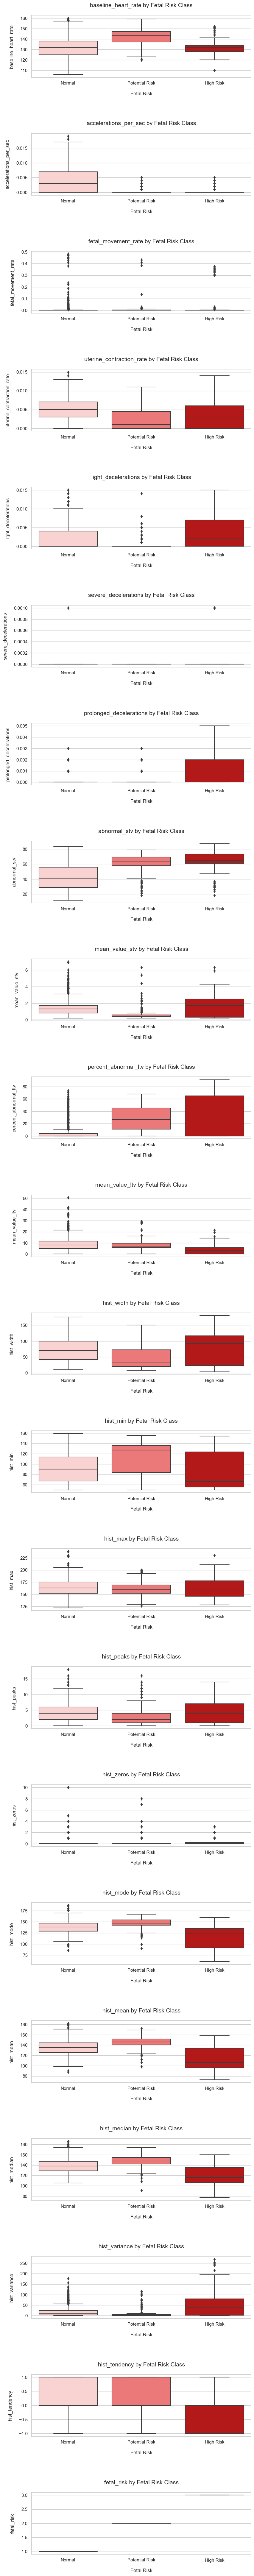

In [45]:
# Set up the plotting style
sns.set(style="whitegrid")

# Define colour palette (red gradient)
risk_palette = {
    'Normal': '#FFCCCC',
    'Potential Risk': '#FF6666',
    'High Risk': '#CC0000'
}

# Convert to ordered categorical
risk_order = ['Normal', 'Potential Risk', 'High Risk']
df['fetal_risk_label'] = pd.Categorical(df['fetal_risk_label'], categories=risk_order, ordered=True)

# Create a subplot for each numeric feature
plt.figure(figsize=(10, len(numeric_features) * 4))

for i, col in enumerate(numeric_features):
    plt.subplot(len(numeric_features), 1, i + 1)
    sns.boxplot(x='fetal_risk_label', y=col, data=df, palette=risk_palette)
    
    # Set title and axis labels with bold fonts and adjusted padding
    plt.title(f'{col} by Fetal Risk Class', fontsize=14, fontweight='medium', pad=20)
    plt.xlabel('Fetal Risk', fontsize=12, fontweight='medium', labelpad=15)
    plt.ylabel(col, fontsize=12, fontweight='medium', labelpad=15)
    
    # Remove legend (if it appears)
    plt.legend([], frameon=False)

    plt.tight_layout(pad=5)

plt.show()


### Comments


- These boxplots by Fetal Risk provide valuable insights into the distribution of each numeric feature across different fetal risk categories
  - abnormal_stv shows the typical values for each class increases as the risk level increases
  - hist_max shows the typical maximum heart rate for all classes are very similar
  - hist_mean shows the typical average heart rate for the High Risk class is lower than Normal and Potential Risk

## **EDA - Prolonged Decelerations**

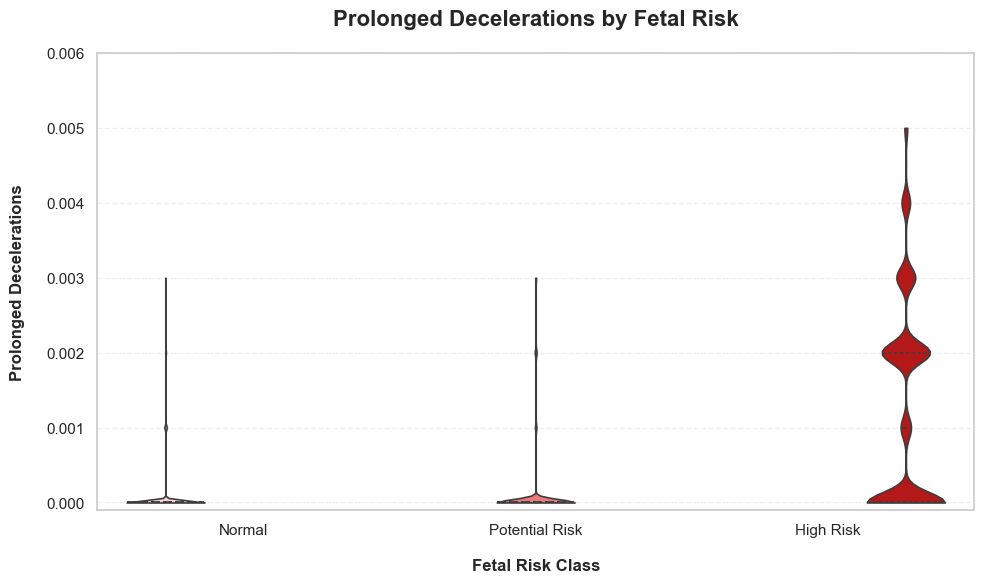

In [46]:
# Violin Plot
plt.figure(figsize=(10, 6))

sns.violinplot(
    x='fetal_risk_label',
    y='prolonged_decelerations',
    data=df,
    hue='fetal_risk_label',            # required for custom palette
    palette={'Normal': '#FFCCCC', 'Potential Risk': '#FF6666', 'High Risk': '#CC0000'},
    inner='quartile',
    linewidth=1.2,
    cut=0,
    scale='width',
    bw=0.1,
    legend=False                      
)

plt.title('Prolonged Decelerations by Fetal Risk', fontsize=16, weight='bold', pad=20)
plt.xlabel('Fetal Risk Class', fontsize=12, weight='bold', labelpad=15)
plt.ylabel('Prolonged Decelerations', fontsize=12, weight='bold', labelpad=15)
plt.legend([], frameon=False)

plt.ylim(-0.0001, 0.006)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### Comments:

- This violin plot shows the density curves of data points for each fetal risk class
- The High Risk class displays a wider distribution, ranging from 0.000 to 0.005
- This suggests that fetuses classified as High Risk tend to experience more prolonged decelerations in heart rate

## **EDA - Abnormal Short Term Variation**

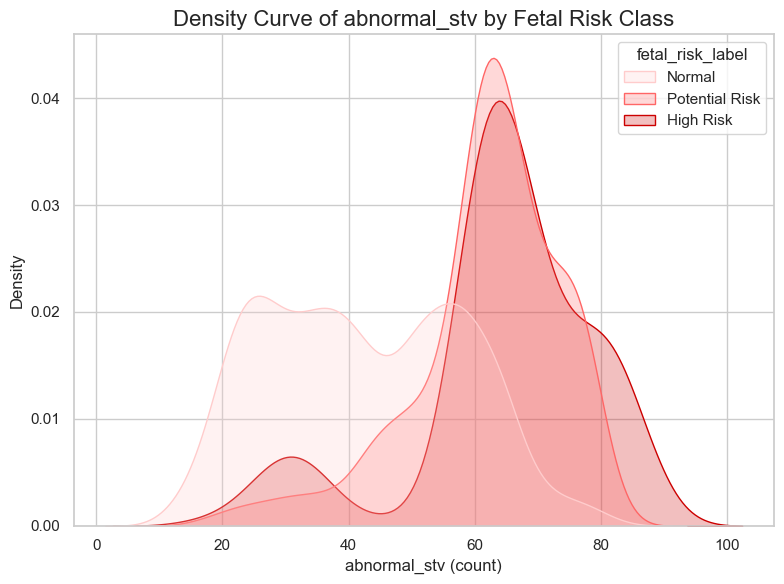

In [47]:
# Density Plot

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='abnormal_stv', hue='fetal_risk_label', palette=['#FFCCCC', '#FF6666', '#CC0000'], fill=True, common_norm=False)
plt.title('Density Curve of abnormal_stv by Fetal Risk Class', fontsize=16, fontweight='medium')
plt.xlabel('abnormal_stv (count)', fontsize=12, fontweight='medium')
plt.ylabel('Density', fontsize=12, fontweight='medium')
plt.tight_layout()
plt.show()


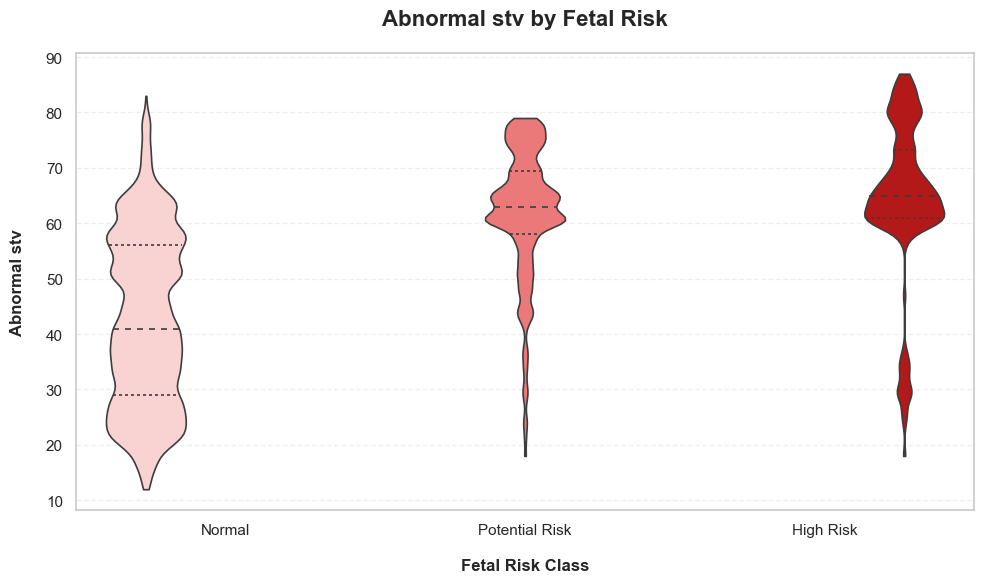

In [48]:
# Violin Plot
plt.figure(figsize=(10, 6))

sns.violinplot(
    x='fetal_risk_label',
    y='abnormal_stv',
    data=df,
    hue='fetal_risk_label',            # required for custom palette
    palette={'Normal': '#FFCCCC', 'Potential Risk': '#FF6666', 'High Risk': '#CC0000'},
    inner='quartile',
    linewidth=1.2,
    cut=0,
    scale='width',
    bw=0.1,
    legend=False                    
)

plt.title('Abnormal stv by Fetal Risk', fontsize=16, weight='bold', pad=20)
plt.xlabel('Fetal Risk Class', fontsize=12, weight='bold', labelpad=15)
plt.ylabel('Abnormal stv', fontsize=12, weight='bold', labelpad=15)
plt.legend([], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


#### Comments:

- The density value in a KDE plot represents the likelihood of a data point occurring in a particular range. It is scaled differently, which is why the values on the y-axis are between 0 and 0.04
- The Normal Risk category exhibits a broader range of abnormal short-term variation (STV) in heart rate, with values ranging from approximately 12 to 84 abnormal short-term variability counts
- The High Risk category shows a higher density of cases with elevated counts of abnormal STV, indicating that fetuses in the High Risk group tend to experience a greater frequency of abnormal STV

## **EDA - Percent Abnormal Long Term Variation**

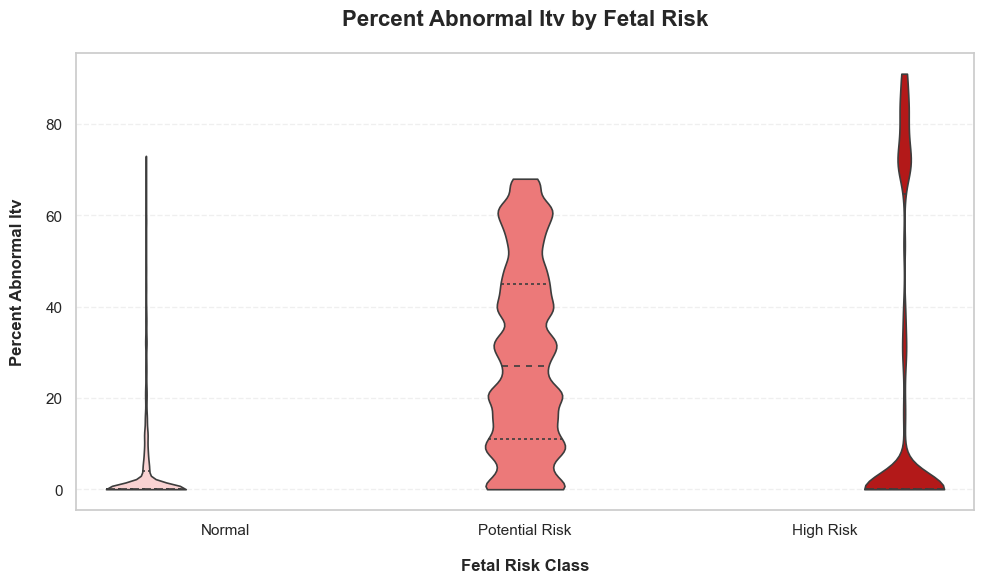

In [49]:
# Violin Plot
plt.figure(figsize=(10, 6))

sns.violinplot(
    x='fetal_risk_label',
    y='percent_abnormal_ltv',
    data=df,
    hue='fetal_risk_label',            # required for custom palette
    palette={'Normal': '#FFCCCC', 'Potential Risk': '#FF6666', 'High Risk': '#CC0000'},
    inner='quartile',
    linewidth=1.2,
    cut=0,
    scale='width',
    bw=0.1,
    legend=False                       
)

plt.title('Percent Abnormal ltv by Fetal Risk', fontsize=16, weight='bold', pad=20)
plt.xlabel('Fetal Risk Class', fontsize=12, weight='bold', labelpad=15)
plt.ylabel('Percent Abnormal ltv', fontsize=12, weight='bold', labelpad=15)
plt.legend([], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Comments:

- The Normal Risk class shows higher density around 0-5% for the percentage of abnormal LTV
- The Potential Risk class has a broader range of values with more evenly distributed density
- The High Risk class exhibits a wide range of values, with greater density around 0-10% and approximately 65-90%, indicating more extreme variations in abnormal LTV

## **EDA - Accelerations Per Sec**

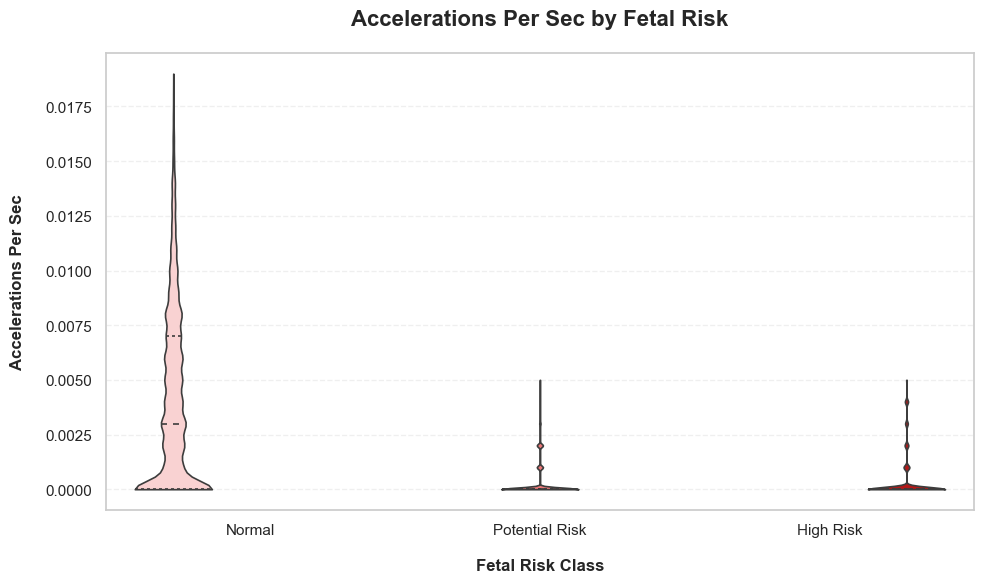

In [50]:
# Violin Plot

plt.figure(figsize=(10, 6))

sns.violinplot(
    x='fetal_risk_label',
    y='accelerations_per_sec',
    data=df,
    hue='fetal_risk_label',            # required for custom palette
    palette={'Normal': '#FFCCCC', 'Potential Risk': '#FF6666', 'High Risk': '#CC0000'},
    inner='quartile',
    linewidth=1.2,
    cut=0,
    scale='width',
    bw=0.1,
    legend=False                       
)

plt.title('Accelerations Per Sec by Fetal Risk', fontsize=16, weight='bold', pad=20)
plt.xlabel('Fetal Risk Class', fontsize=12, weight='bold', labelpad=15)
plt.ylabel('Accelerations Per Sec', fontsize=12, weight='bold', labelpad=15)
plt.legend([], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Comments:

- Potential Risk and High Risk classes show similar ranges and density, with both exhibiting very low bpm accelerations per second
- The Normal Risk class stands out, displaying a much higher range of accelerations per second
- This suggests that higher fetal risk is associated with lower heart rate accelerations per second, while a higher range of accelerations are indicative of less risk

## **EDA - Histogram Mean**

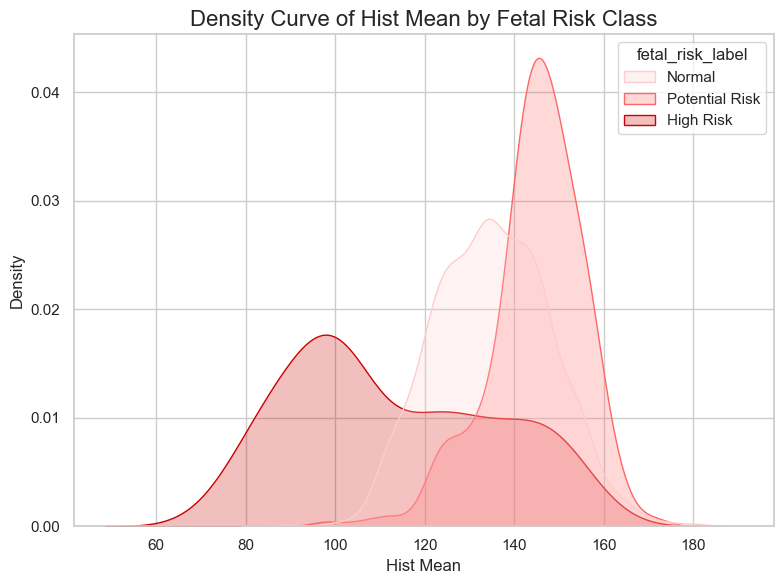

In [51]:
# Density Plot

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='hist_mean', hue='fetal_risk_label', palette=['#FFCCCC', '#FF6666', '#CC0000'], fill=True, common_norm=False)
plt.title('Density Curve of Hist Mean by Fetal Risk Class', fontsize=16, fontweight='medium')
plt.xlabel('Hist Mean', fontsize=12, fontweight='medium')
plt.ylabel('Density', fontsize=12, fontweight='medium')
plt.tight_layout()
plt.show()


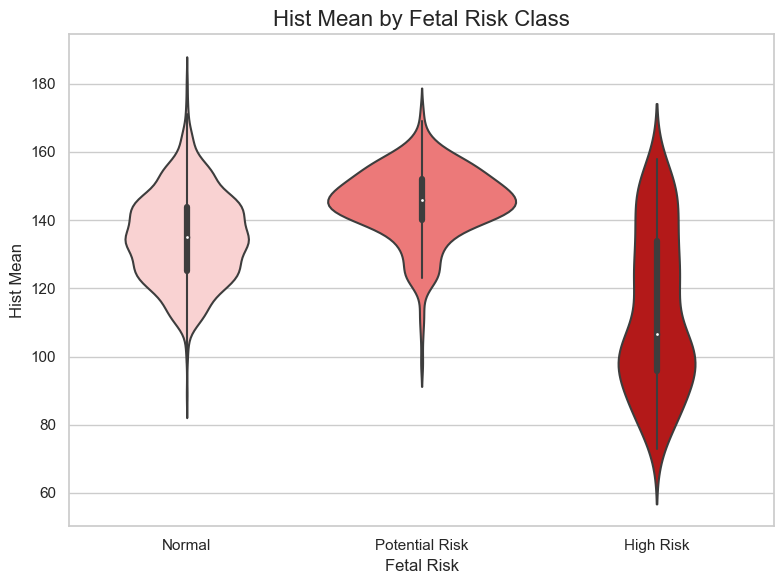

In [52]:
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='fetal_risk_label', y='hist_mean', data=df, palette=['#FFCCCC', '#FF6666', '#CC0000'])
plt.title('Hist Mean by Fetal Risk Class', fontsize=16, fontweight='medium')
plt.xlabel('Fetal Risk', fontsize=12, fontweight='medium')
plt.ylabel('Hist Mean', fontsize=12, fontweight='medium')
plt.tight_layout()
plt.show()


### Comments:

- A normal fetal heart rate typically ranges between 110 and 160 beats per minute (bpm)

  - 110–160 bpm → **Normal**

  - Below 110 bpm → **Bradycardia (too slow)**

  - Above 160 bpm → **Tachycardia (too fast)**
 
- These plots show that fetuses in the High Risk class have a lower average heart rate compared to the other categories, and a higher BPM could indicate lower risk

## **EDA - Exploring Multi-Colinearity**

#### Histogram Mode vs Hist Median

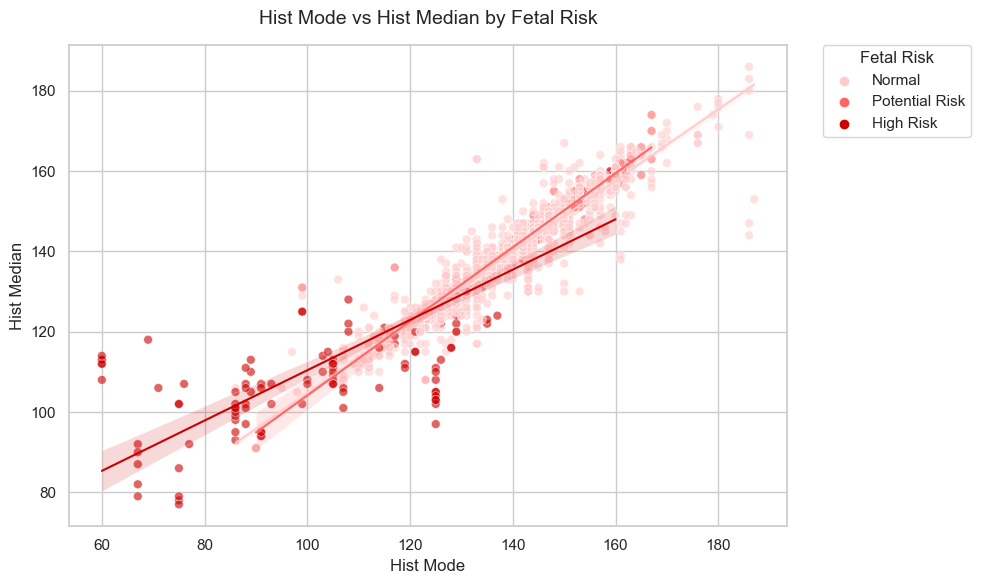

In [53]:
# Scatter plot with regression lines


# Set the plotting style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='hist_mode',
    y='hist_median',
    hue='fetal_risk_label',
    palette=['#FFCCCC', '#FF6666', '#CC0000'],
    alpha=0.6,
    s=40
)

# Add separate regression lines for each class
risk_palette = {
    'Normal': '#FFCCCC',
    'Potential Risk': '#FF6666',
    'High Risk': '#CC0000'
}
for label, color in risk_palette.items():
    sns.regplot(
        data=df[df['fetal_risk_label'] == label],
        x='hist_mode',
        y='hist_median',
        scatter=False,
        color=color,
        line_kws={"linewidth": 1.5}
    )


plt.title('Hist Mode vs Hist Median by Fetal Risk', fontsize=14, pad=15)
plt.xlabel('Hist Mode', fontsize=12)
plt.ylabel('Hist Median', fontsize=12)


plt.legend(title='Fetal Risk', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


### Comments:

- This plot illustrates a clear positive linear relationship between hist_mode and hist_median
- Separate trend lines are plotted for each fetal risk category to highlight the relationship within each group
- As the median fetal heart rate (hist_median) increases, the mode of the heart rate (hist_mode) also tends to increase across all risk categories
- This result aligns with logical expectations and supports the consistency of the data

#### Histogram Mean vs Baseline Heart Rate

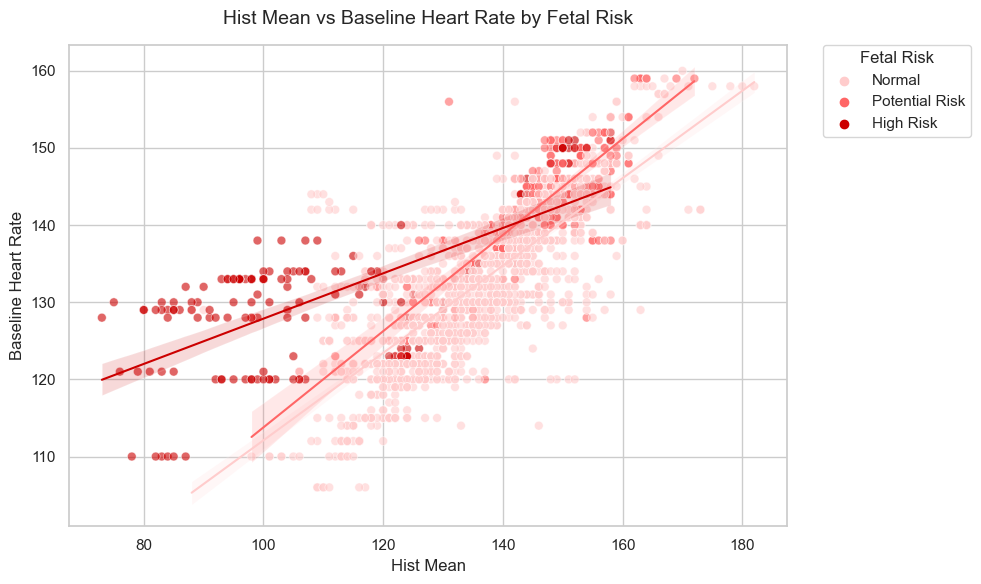

In [54]:
# Scatter plot with regression lines


# Set the plotting style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='hist_mean',
    y='baseline_heart_rate',
    hue='fetal_risk_label',
    palette=['#FFCCCC', '#FF6666', '#CC0000'],
    alpha=0.6,
    s=40
)

# Add separate regression lines for each class
risk_palette = {
    'Normal': '#FFCCCC',
    'Potential Risk': '#FF6666',
    'High Risk': '#CC0000'
}
for label, color in risk_palette.items():
    sns.regplot(
        data=df[df['fetal_risk_label'] == label],
        x='hist_mean',
        y='baseline_heart_rate',
        scatter=False,
        color=color,
        line_kws={"linewidth": 1.5}
    )


plt.title('Hist Mean vs Baseline Heart Rate by Fetal Risk', fontsize=14, pad=15)
plt.xlabel('Hist Mean', fontsize=12)
plt.ylabel('Baseline Heart Rate', fontsize=12)


plt.legend(title='Fetal Risk', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


### Comments:

- This plot illustrates a clear positive linear relationship between hist_mean and baseline_heart_rate
- Separate trend lines are plotted for each fetal risk category to highlight the relationship within each group
- As the average fetal heart rate (hist_mean) increases, the baseline heart rate also tends to increase across all risk categories
- This finding aligns with expectations and supports logical reasoning based on the nature of the data - the baseline heart rate is the average fetal BPM without contractions, accelerations, or decelerations, over a 10 minute period. Hist_mean is the average fetal heart rate over the entire monitoring period.

#### Dropping labelled feature

**To avoid data leakage and model errors - the fetal_risk_label will be dropped before modelling**

In [55]:
df.drop(columns=['fetal_risk_label'], inplace=True)

In [56]:
# Checking that the feature has been dropped
df.head()

,baseline_heart_rate,accelerations_per_sec,fetal_movement_rate,uterine_contraction_rate,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_stv,mean_value_stv,percent_abnormal_ltv,...,hist_min,hist_max,hist_peaks,hist_zeros,hist_mode,hist_mean,hist_median,hist_variance,hist_tendency,fetal_risk
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## **Model Pipelines and Evaluation**

### Model Pipeline 1 - Baseline Models

In [57]:
# PIPELINE 1 - Baseline Models


def run_pipeline_1(data, target_column='fetal_risk', random_state=42):
    # Feature + target split
    X = data.drop(columns=[target_column])
    y = data[target_column] - 1  # Convert to 0, 1, 2

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=random_state
    )

    # Compute class weights and map them to training samples
    class_weights_array = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}
    sample_weights = y_train.map(class_weights)

    # Models
    models = {
        'Random Forest': RandomForestClassifier(random_state=random_state, class_weight=class_weights),
        'XGBoost': XGBClassifier(random_state=random_state, verbosity=0),
        'Gradient Boosting': GradientBoostingClassifier(random_state=random_state)
    }

    class_names = ["Normal", "Potential Risk", "High Risk"]
    trained_models = {}
    roc_data = {}

    for name, model in models.items():
        print(f"\n{name}")
        print("=" * len(name))

        # Pipeline
        pipeline = Pipeline([
            ('scaler', RobustScaler()),
            ('classifier', model)
        ])

        # Fit
        if name == 'Random Forest':
            pipeline.fit(X_train, y_train)
        else:
            pipeline.fit(X_train, y_train, classifier__sample_weight=sample_weights)

        trained_models[name] = pipeline

        # Predict
        y_pred = pipeline.predict(X_test)

        # Classification Report
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names, linewidths=1, linecolor='gray')
        plt.title(f'{name} - Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()

        # Learning Curve
        train_sizes, train_scores, test_scores = learning_curve(
            pipeline, X_train, y_train,
            cv=5,
            scoring='f1_macro',
            train_sizes=np.linspace(0.1, 1.0, 5),
            random_state=random_state
        )
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)

        plt.figure(figsize=(6, 4))
        plt.plot(train_sizes, train_scores_mean, label='Train F1 Score')
        plt.plot(train_sizes, test_scores_mean, label='Validation F1 Score')
        plt.title(f'{name} - Learning Curve')
        plt.xlabel('Training Size')
        plt.ylabel('F1 Score')
        plt.legend()
        plt.ylim(0.72, 1.02)
        plt.yticks([0.75, 0.80, 0.85, 0.90, 0.95, 1.00]) # Consistent scale across all learning curve plots
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # ROC Curve
        y_proba = pipeline.predict_proba(X_test)
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
        roc_auc = auc(fpr, tpr)
        roc_data[name] = (fpr, tpr, roc_auc)

    # Final ROC Curve - All Models
    plt.figure(figsize=(8, 6))
    for name, (fpr, tpr, roc_auc) in roc_data.items():
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title('ROC Curve - All Models')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return trained_models



Random Forest
Classification Report:
                precision    recall  f1-score   support

        Normal     0.9425    0.9880    0.9647       332
Potential Risk     0.9070    0.6610    0.7647        59
     High Risk     0.9143    0.9143    0.9143        35

      accuracy                         0.9366       426
     macro avg     0.9213    0.8544    0.8812       426
  weighted avg     0.9353    0.9366    0.9329       426



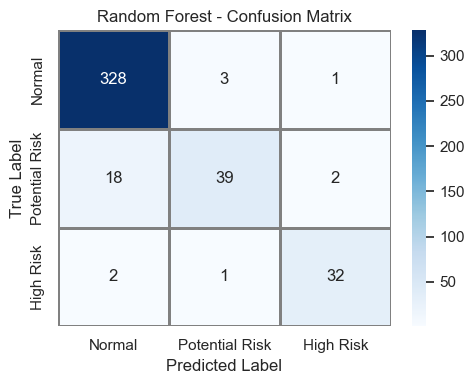

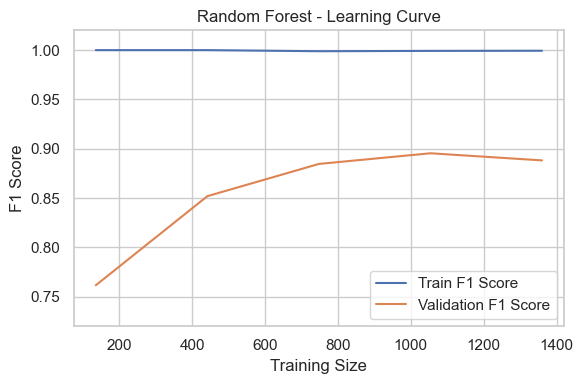


XGBoost
Classification Report:
                precision    recall  f1-score   support

        Normal     0.9672    0.9759    0.9715       332
Potential Risk     0.8545    0.7966    0.8246        59
     High Risk     0.8889    0.9143    0.9014        35

      accuracy                         0.9460       426
     macro avg     0.9035    0.8956    0.8992       426
  weighted avg     0.9451    0.9460    0.9454       426



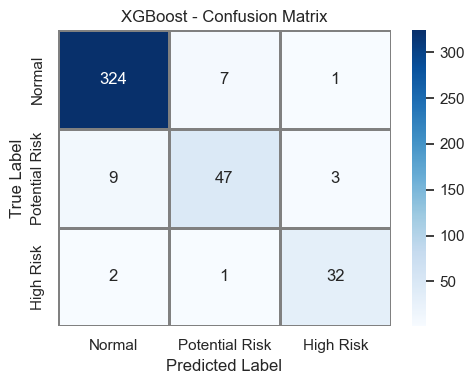

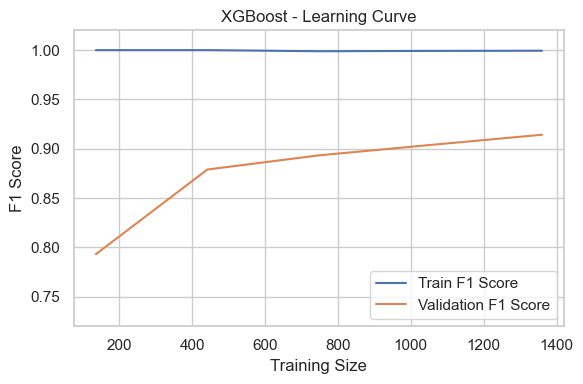


Gradient Boosting
Classification Report:
                precision    recall  f1-score   support

        Normal     0.9632    0.9458    0.9544       332
Potential Risk     0.7188    0.7797    0.7480        59
     High Risk     0.8889    0.9143    0.9014        35

      accuracy                         0.9202       426
     macro avg     0.8569    0.8799    0.8679       426
  weighted avg     0.9232    0.9202    0.9215       426



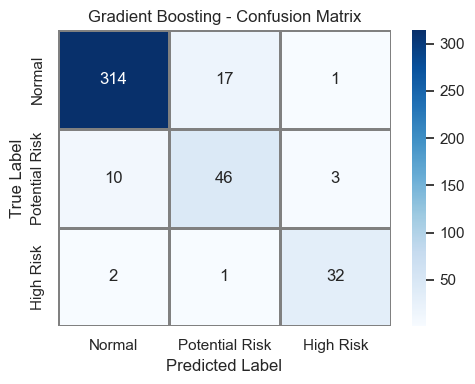

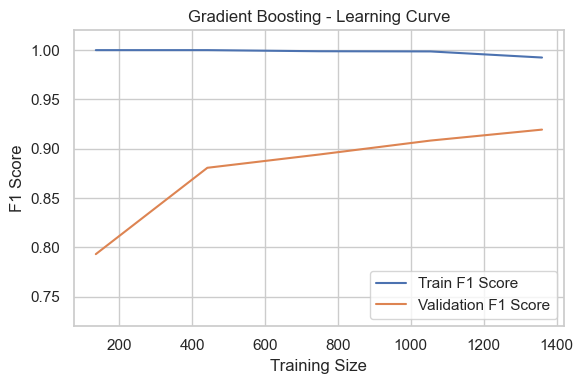

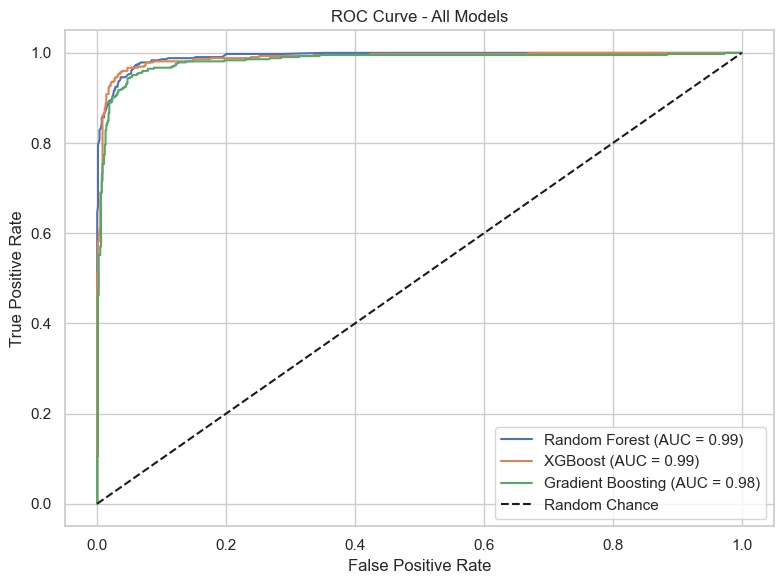

In [58]:
# Call Function
trained_models = run_pipeline_1(df, target_column='fetal_risk')

## Evaluation - Model Pipeline 1 

### **Random Forest**

- **Macro F1-score: 0.8812**

- ***Confusion Matrix:***

  - **Normal:** Out of 332 actual Normal cases, **328 were correctly predicted - 98.8% recall** (almost all true Normals were caught).

  - **Potential Risk:** Out of 59 actual Potential Risk cases, **only 39 were correctly identified - 66.1% recall**, meaning ~1 in 3 Potential Risk cases were   missed.

  - **High Risk:** Out of 35 actual High Risk cases, **32 were correctly identified - 91.4% recall**,
 

- ***Learning Curve:***

  - **Training line:** Flat at 1.0 - Random Forest fits training data perfectly (zero training error), suggesting **overfitting**

  - **Validation line:** Increases up to ~0.90, then dips slightly - shows some overfitting, but reasonable generalization.

- ***Precision & Recall Summary:***

  - **High precision and recall** for Normal and High Risk classes - these predictions are both accurate and complete.

  - **Lower recall** for Potential Risk suggests the model often fails to catch moderate-risk cases, which may be problematic in clinical settings.



### **XGBoost**

- **Macro F1-score: 0.8992** - Highest of all models

  
- ***Confusion Matrix:***

  - **Normal:** 324/332 correct - **97.6% recall**

  - **Potential Risk:** 47/59 correctly identified → **79.7% recall, best among all models;** means nearly 4 in 5 Potential Risk cases were correctly caught.

  - **High Risk:** 32/35 - **91.4% recall**.

- ***Learning Curve:***

  - **Training line:** Flat at 1.0 - very high training performance, suggesting **overfitting**.

  - **Validation line:** Starts at ~0.80 and increases steadily → indicates the model continues to learn as more data is used, but **is overfitting**

 
- ***Precision & Recall Summary:***

  - Strong performance across all classes, especially **excellent recall on the Normal class**

   - High recall means **fewer false negatives** — critical for a risk prediction task

  - High precision ensures **predicted risks are rarely false alarms**

### **Gradient Boosting**

- **Macro F1-score: 0.8679**

  
- ***Confusion Matrix:***
  - **Normal:** 314/332 - **94.6% recall**, slightly weaker than RF/XGB.

  - **Potential Risk:** 46/59 - **77.9% recall**, better than RF but slightly worse than XGB.

  - **High Risk:** 32/35 - **91.4% recall**, consistent with others.

- ***Learning Curve:***
  - **Training line:** Flat at 1.0 suggesting **overfitting**

  - **Validation line:** Starts at ~0.80 and increases - good signs of **learning from more data**
 

- ***Precision & Recall Summary:***

  - Good recall on Potential and High Risk classes.

  - Slightly lower precision on Potential Risk - **more false positives** which may lead to unnecessary interventions.

#### **ROC/AUC Curve**
The ROC/AUC (Receiver Operating Characteristic / Area Under the Curve) measures the model’s ability to distinguish between classes. A value of 0.99 means the model has a very high true positive rate (correctly identifies positive cases) and a low false positive rate (incorrectly identifies negative cases as positive). The closer the AUC is to 1, the better the model is at making accurate predictions. The AUC scores from all models indicate they perform well at distinguishing between the 3 fetal risk classes.

### Model Comparison:

All three models showed signs of overfitting, with their training scores plateauing at 1.0 in the learning curves. This indicates that the models fit the training data perfectly but struggled to generalize to unseen data. Among them, Gradient Boosting showed the smallest gap between training and validation curves, suggesting slightly better generalization. The overfitting likely stems from the absence of hyperparameter tuning, particularly for controlling model complexity (e.g., tree depth). Despite this, XGBoost achieved the highest macro F1-score, demonstrating strong predictive performance — though its overfitting highlights the need for further tuning to improve robustness.

### MODEL PIPELINE 2

In [59]:
# Pipeline 2 - Tuned Models


def run_pipeline_2(data, target_column='fetal_risk', random_state=42):

     # Data split
    X = data.drop(columns=[target_column])
    y = data[target_column] - 1
    class_names = ['Normal', 'Potential Risk', 'High Risk']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=random_state
    )

    # Compute class weights and map them to training samples
    class_weights_array = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}
    sample_weights = y_train.map(class_weights)

    # Models and hyperparameters
    models = {
        'Random Forest': (RandomForestClassifier(random_state=random_state, class_weight='balanced'), {
            'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [None, 10, 20, 30, 40],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        }),
        'XGBoost': (XGBClassifier(random_state=random_state, verbosity=0), {
            'n_estimators': [200, 300, 500, 700],                    
            'learning_rate': [0.01, 0.05, 0.1],                      
            'max_depth': [2, 3, 4, 5],                              
            'subsample': [0.6, 0.7, 0.8],                            
            'colsample_bytree': [0.6, 0.7, 0.8],                    
            'reg_alpha': [0, 0.1, 0.5, 1.0],                        
            'reg_lambda': [0.5, 1.0, 1.5, 2.0],                      
            'min_child_weight': [3, 5, 7, 10],                       
            'gamma': [0.1, 0.3, 0.5, 1]       

        }),
        'Gradient Boosting': (GradientBoostingClassifier(random_state=random_state), {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'subsample': [0.6, 0.8, 1.0],
            'max_features': ['sqrt', 'log2', None]
        })
    }

    trained_models = {}
    roc_data = {}

    for name, (model, params) in models.items():
        print(f"\n{name}")
        print("=" * len(name))

        pipeline = Pipeline([
            ('scaler', RobustScaler()),
            ('classifier', model)
        ])

        search = RandomizedSearchCV(
            pipeline,
            param_distributions={f'classifier__{k}': v for k, v in params.items()},
            n_iter=25,
            scoring='f1_macro',
            cv=7,
            random_state=random_state,
            n_jobs=-1
        )

        if name == 'Random Forest':
            search.fit(X_train, y_train)
        else:
            search.fit(X_train, y_train, classifier__sample_weight=sample_weights)

        best_model = search.best_estimator_

        print("\nBest Hyperparameters:")
        for param, value in search.best_params_.items():
            print(f"  {param}: {value}")

        trained_models[name] = best_model
        y_pred = best_model.predict(X_test)

        print(f"\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names,
                    linewidths=0.5, linecolor='black', cbar=False)
        plt.title(f'{name} - Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.show()

        # Learning Curve
        train_sizes, train_scores, test_scores = learning_curve(
            best_model, X_train, y_train, scoring='f1_macro',
            train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1
        )
        plt.figure(figsize=(6, 4))
        plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
        plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
        plt.title(f'{name} - Learning Curve')
        plt.xlabel('Training Set Size')
        plt.ylabel('F1 Score')
        plt.legend()
        plt.grid(True)
        plt.legend(loc='lower right')
        plt.ylim(0.72, 1.02)
        plt.yticks([0.75, 0.80, 0.85, 0.90, 0.95, 1.00]) # Consistent scale across all learning curve plots
        plt.tight_layout()
        plt.show()

        # Feature Importance
        classifier = best_model.named_steps['classifier']
        if hasattr(classifier, 'feature_importances_'):
            importances = classifier.feature_importances_
            top_idx = np.argsort(importances)[-10:]
            plt.figure(figsize=(7, 4))
            plt.barh(np.array(X.columns)[top_idx], importances[top_idx], color='skyblue')
            plt.xlabel('Importance')
            plt.title(f'{name} - Top 10 Feature Importances')
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        # ROC Curve (multiclass, flattened)
        y_proba = best_model.predict_proba(X_test)
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
        roc_auc = auc(fpr, tpr)
        roc_data[name] = (fpr, tpr, roc_auc)

    # Combined ROC Curve
    plt.figure(figsize=(7, 5))
    for name, (fpr, tpr, roc_auc) in roc_data.items():
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return trained_models



Random Forest

Best Hyperparameters:
  classifier__n_estimators: 100
  classifier__min_samples_split: 10
  classifier__min_samples_leaf: 2
  classifier__max_features: None
  classifier__max_depth: None
  classifier__bootstrap: True

Classification Report:
                precision    recall  f1-score   support

        Normal     0.9606    0.9548    0.9577       332
Potential Risk     0.7833    0.7966    0.7899        59
     High Risk     0.8333    0.8571    0.8451        35

      accuracy                         0.9249       426
     macro avg     0.8591    0.8695    0.8642       426
  weighted avg     0.9256    0.9249    0.9252       426



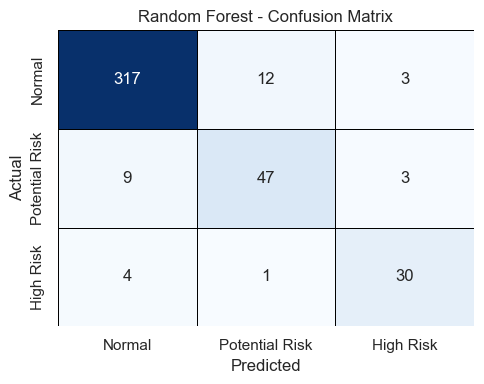

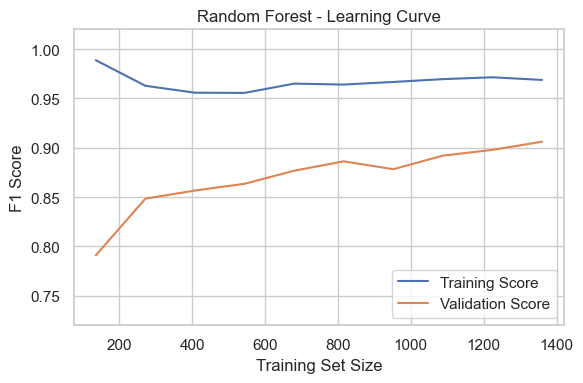

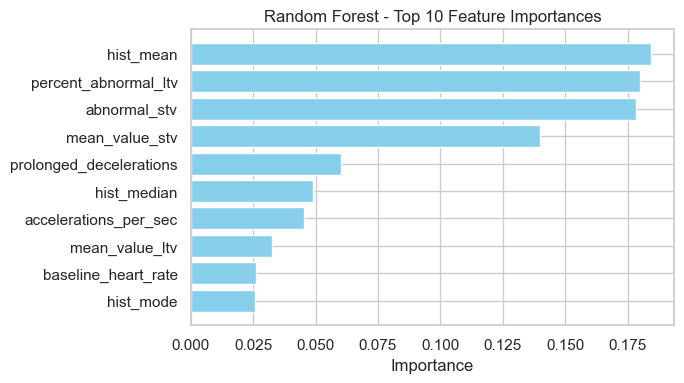


XGBoost

Best Hyperparameters:
  classifier__subsample: 0.7
  classifier__reg_lambda: 0.5
  classifier__reg_alpha: 0.5
  classifier__n_estimators: 500
  classifier__min_child_weight: 3
  classifier__max_depth: 2
  classifier__learning_rate: 0.1
  classifier__gamma: 0.1
  classifier__colsample_bytree: 0.6

Classification Report:
                precision    recall  f1-score   support

        Normal     0.9750    0.9398    0.9571       332
Potential Risk     0.7353    0.8475    0.7874        59
     High Risk     0.8684    0.9429    0.9041        35

      accuracy                         0.9272       426
     macro avg     0.8596    0.9100    0.8829       426
  weighted avg     0.9330    0.9272    0.9292       426



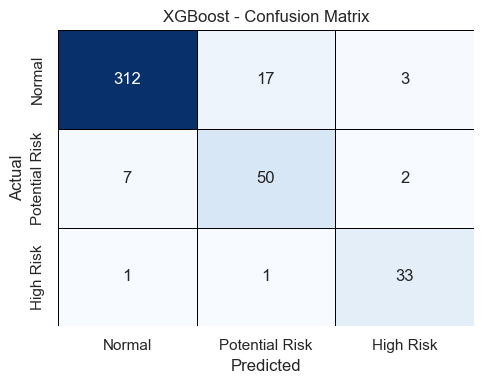

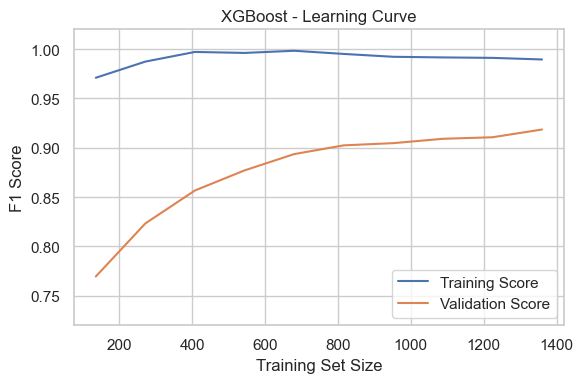

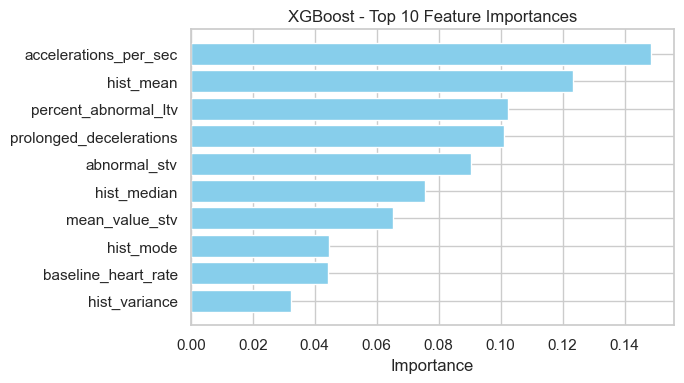


Gradient Boosting

Best Hyperparameters:
  classifier__subsample: 1.0
  classifier__n_estimators: 200
  classifier__min_samples_split: 2
  classifier__min_samples_leaf: 4
  classifier__max_features: None
  classifier__max_depth: 5
  classifier__learning_rate: 0.2

Classification Report:
                precision    recall  f1-score   support

        Normal     0.9588    0.9819    0.9702       332
Potential Risk     0.8800    0.7458    0.8073        59
     High Risk     0.8889    0.9143    0.9014        35

      accuracy                         0.9437       426
     macro avg     0.9092    0.8807    0.8930       426
  weighted avg     0.9422    0.9437    0.9420       426



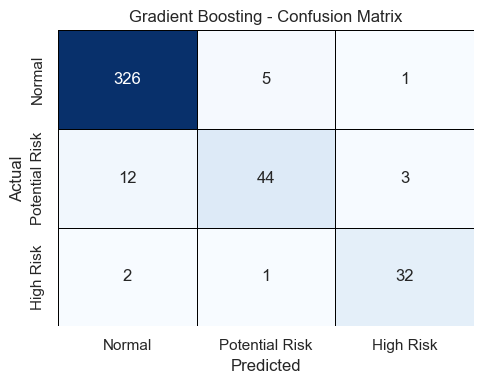

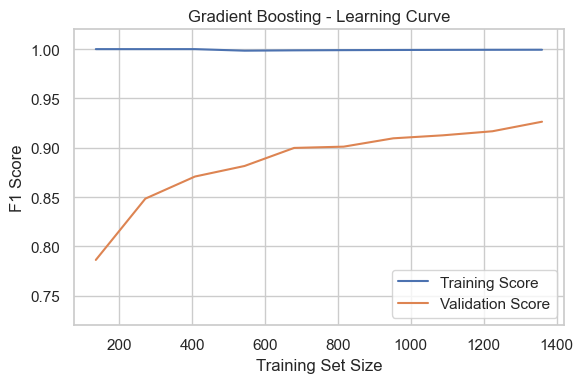

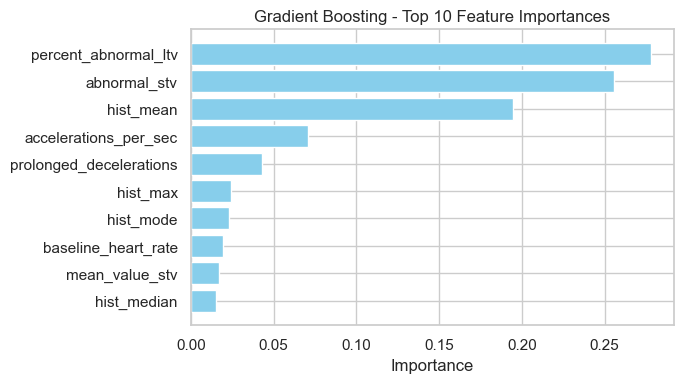

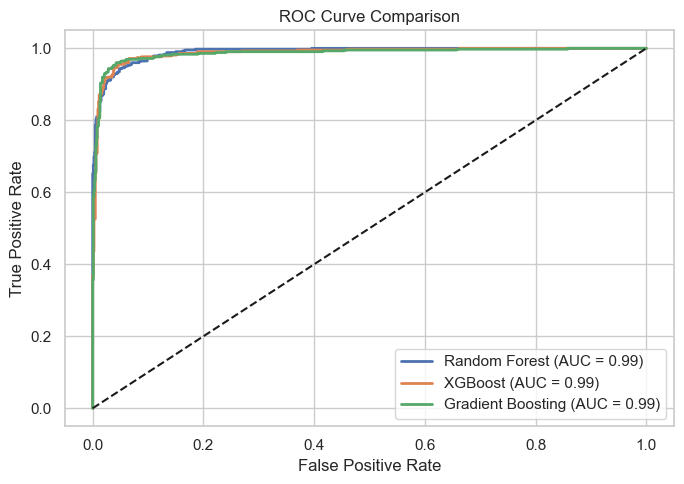

In [60]:
# Call Function
trained_models = run_pipeline_2(df, target_column='fetal_risk')

## Evaluation - Model Pipeline 2 

**Note on Cross-Validation:**
A 7-fold cross-validation (cv=7) was used during hyperparameter tuning to provide robust model evaluation. For the learning curves, 5-fold cross-validation (cv=5) was used to reduce computational load while still providing a reliable view of model learning behavior

### **Random Forest**

**Macro F1-score:** 0.864

**Best Hyperparameters:**
  - n_estimators: 100

  - min_samples_split: 10

  - min_samples_leaf: 2

  - max_features: None

  - max_depth: None

  - bootstrap: True

***Top Features:*** hist_mean, percent_abnormal_ltv, abnormal_stv

***Confusion Matrix:***

  - **Normal:** Precision = 96.06%, Recall = 95.48%, F1-Score = 95.77%. Out of 332 predictions for Normal, 96.06% were correct, and 95.48% of actual Normal cases were correctly predicted.

  - **Potential Risk:** Precision = 78.33%, Recall = 79.66%, F1-Score = 78.99%. Out of 59 predictions for Potential Risk, 78.33% were correct, and 79.66% of actual Potential Risk cases were correctly predicted.

 - **High Risk:** Precision = 83.33%, Recall = 85.71%, F1-Score = 84.51%. Out of 35 predictions for High Risk, 83.33% were correct, and 85.71% of actual High Risk cases were correctly predicted.
 

***Learning Curve:***

  - **Training line:** The training line starts at 1 and slightly drops, ranging from 0.95 to 0.975
  - **Validation line:** 
the cross-validation line starts at 0.8 and increases, indicating improved generalization compared to previous iterations. Overfitting is still present, but less pronounced.


### **XGBoost**

**Macro F1-score:** 0.899

**Best Hyperparameters:**
  - subsample: 0.7

  - reg_lambda: 0.5

  - reg_alpha: 0.5

  - n_estimators: 500

  - min_child_weight: 3

  - max_depth: 2

  - learning_rate: 0.1

  - gamma: 0.1

  - colsample_bytree: 0.6

***Top Features:*** accelerations_per_sec, hist_mean, percent_abnormal_ltv

***Confusion Matrix:***

  - **Normal:** Precision = 97.50%, Recall = 93.98%, F1-Score = 95.71%. Out of 332 predictions for Normal, 97.50% were correct, and 93.98% of actual Normal cases were correctly predicted.

  - **Potential Risk:** Precision = 73.53%, Recall = 84.75%, F1-Score = 78.74%. Out of 59 predictions for Potential Risk, 73.53% were correct, and 84.75% of actual Potential Risk cases were correctly predicted.

    
 - **High Risk:** Precision = 86.84%, Recall = 94.29%, F1-Score = 90.41%. Out of 35 predictions for High Risk, 86.84% were correct, and 94.29% of actual High Risk cases were correctly predicted.

***Learning Curve:***

  - **Training line:** Slightly improved, showing less overfitting compared to Pipeline 1. The model still memorizes the training data to some degree, but it generalizes better than before.
  - **Validation line:** The cross-validation line starts at 0.8 and increases, showing that the model generalizes well but doesn't match the training performance exactly.


### **Gradient Boosting**

**Macro F1-score:** 0.893

**Best Hyperparameters:**
  - subsample: 1.0

  - n_estimators: 200

  - min_samples_split: 2

  - min_samples_leaf: 4

  - max_features: None

  - max_depth: 5

  - learning_rate: 0.2

***Top Features:*** percent_abnormal_ltv, abnormal_stv, hist_mean

***Confusion Matrix:***

  - **Normal:** Precision = 95.88%, Recall = 98.19%, F1-Score = 97.82%. Out of 332 predictions for Normal, 95.88% were correct, and 98.19% of actual Normal cases were correctly predicted.

  - **Potential Risk:** Precision = 88%, Recall = 74.58%, F1-Score = 80.73%. Out of 59 predictions for Potential Risk, 88% were correct, and 74.58% of actual Potential Risk cases were correctly predicted.

 - **High Risk:** Precision = 88.89%, Recall = 91.43%, F1-Score = 90.14%. Out of 35 predictions for High Risk, 88.89% were correct, and 91.43% of actual High Risk cases were correctly predicted.

***Learning Curve:***

  - **Training line:** The training line is flat at 1, still indicating overfitting
  - **Validation line:** The cross-validation line starts at 0.8 and increases, showing that the model generalizes well but doesn't match the training performance exactly.


#### **ROC/AUC Curve**
All models AUC scores were very high at 99%, all performing very well

### Model Comparison:

After hyperparameter tuning, **XGBoost was selected as the best overall model**. While Gradient Boosting achieved the highest macro F1-score, it showed greater overfitting on the learning curve. In contrast, XGBoost had slightly lower performance but generalized better, making it the more stable and reliable choice—especially important in clinical applications.